# 분류실습예제 : 캐글 신용카드 사기 검출

신용카드 데이터 세트 특징
- 2013년 European Card 사용 트랜잭션을 가공해서 생성
- 불균형(Imbalanced)되어 있는 데이터 셋 284,807건의 데이터 중 492건이 Fraud(사기)

레이블인 Class 속성이 매우 불균형한 분포
- 0 값 : 정상 트랜잭선
- 1 값 : 사기 트랜잭션 (0.172 %)
    
일반적인 사기 검출(Fraud Detection)이나 이상 검출(Anomaly Detection)과 데이터 세트는  
레이블 값이 극도로 불균형한 분포를 이룸  
사기와 같은 이상 현상은 전체 데이터에서 차지하는 비중이 매우 적기 때문

# Credit Card Fraud Detection ML 모델 규칙
## 다양한 Feature Engineering방식을
## Logistic Regression과 LightGBM 방식을 이용하여
## 각 방식에 적용 후 평가 비교
## Feature Engineering
### 피처들 중 어떤 것이 모델링할 때 중요한 것인지 결정하는 과정
### 모델 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어서 상당히 중요한 단계
### 전문성과 시간, 비용이 많이 드는 작업
### PCA 방식 사용

## PCA : 주성분 분석
### 대표적인 차원 축소 알고리즘
### 여러 변수간에 존재하는 상관관계를 이용해 대표하는 주성분을 추출하여 차원을 축소하는 방법
### 간단하게 가장 높은 분산을 가지는 데이터의 축을 찾아 차원을 축소

## 차원축소
### 많은 피처로 구성된 다차원 데이터 셋을 차원을 축소하여 새로운 차원의 데이터 셋을 생성하는 것

## Feature Engineering 주요 작업
### 주요 Feature 데이터 분포도 변경 : Log 변환
### 이상치 제거
### SMOTE 오버 샘플링

## Log 변환
### 왜곡된 분포도를 가진 데이터 셋을
### 비교적 정규 분포에 가깝게 변환하는 피쳐 엔지니어링 방식 

## 분포도가 왜곡되어 있다면 해결 방법은 로그 변환이 답
## 일반수치 10,100,1000하면 10과 100사이가 크지만
## 로그화하면 log(10) 1, log(100)은 2 이렇게 변환
## 이처럼 간극이 일정하기 때문에 로그 변환을 이용하면 왜곡된 분포들을 쉽게 정규 변환 형태로 변경 가능 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


# 언더 샘플링과 오버 샘플링
## 레이블이 불균형한 분포를 가진 데이터 셋을 학습 시 예측 성능의 문제 발생
## 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적어 
## 다양한 유형을 학습하지 못하고 일방적으로 너무 많은 정상 레이블로 치우친 학습을 수행하기 때문에
## 제대로 된 이상 데이터 검출이 어려움

# 지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해서는 적절한 양의 학습 데이터를 확보해야 함
## 대표적으로 오버 샘플링과 언더 샘플링이 있음
# 오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아서 주로 사용

## 1. 언더 샘플링
### 많은 레이블을 가진 데이터 셋을 적은 데이터 셋 수준으로 감소시키는 방식
### 너무 많은 정상 레이블 데이터를 감소시키기 때문에 
### 정상 레이블의 경우 제대로 된 학습을 수행할 수 없다는 단점이 있어서 잘 적용하지 않음 

## 2. 오버 샘플링
### 적은 레이블을 가진 데이터 셋을 많은 데이터 셋 수준으로 증식시키는 방식
### 학습을 위한 충분한 데이터 확보
### 그러나 동일한 데이터를 단순히 증식하는 방법은 과적합이 되기 때문에 의미 없고
### 원본 데이터의 피쳐 값들을 약간만 변경해서 증식
### 대표적인 방법이 SMOTE방식

# SMOTE 방식
## 적은 데이터 세트에 있는 개별 데이터들의
## K 최근접 이웃을 찾아서
## K개 이웃들과의 차이를 일정 값으로 만들어서
## 기존 데이터와 약간 차이가 나는 새로운 데이터 생성하는 방식

# 신용카드 사기 검출 과정
1. 데이터 1차 가공 및 모델 학습/예측
2. 중요 데이터의 분포도 변환 후 모델을 학습/예측/평가
3. 이상치 데이터 제거 후 다시 모델을 학습/예측/평가 (+ 로그변환 포함)
4. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

# 1. 데이터 1차 가공 및 모델 학습/예측/평가

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('./data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## 앞으로 처리할 기능을 함수로 작성
### 모델 특징 파악을 피쳐 엔지니어링을 하겠다는 것
### 데이터에 대해 로그 변환하고 아웃라이어 디텍션하고 오버 샘플링
### 2개의 서로 다른 머신러닝 알고리즘에 적용 (Logistic regression, lightGBM)
### 각각의 알고리즘에 대해 예측 성능 평가
### 반복적으로 데이터 가공, 학습과 테스트 데이터 분리
### 학습/테스트/성능 평가하는 것을 계속 호출할 것이기 때문에 각 기능을 함수로 작성

In [16]:
from sklearn.model_selection import train_test_split

# 불필요한 time column은 삭제하고 복사된 DataFrame 반환 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace = True)
    return df_copy

In [17]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    df_copy=get_preprocessed_df(df)

    x_features = df_copy.iloc[:,:-1] # 나머지는 피쳐들 (마지막 컬럼 빼고 전체)
    y_target = df_copy.iloc[:,-1] # 맨 마지막 컬럼이 label (마지막 컬럼만)

    # stratify=y_target으로 Stratified 기반 분할 
    X_train,X_test,y_train,y_test = train_test_split(x_features,y_target, test_size=0.3, random_state=0, stratify=y_target)

    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [18]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

# 학습 데이터 레이블의 경우 1값이 0.172%
# 테스트 데이터 레이블의 경우 1값이 약 0.173%로 큰 차이가 없이 잘 분할 

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [10]:
# 앞에서 작성한 get_clf_eval()함수 가져오기 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [11]:
# 인자로 사이킷런의 estimator객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None,ftr_test=None,tgt_train=None,tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba=model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba)

## 1. LogisticRegression 이용한 모델

In [12]:
# 로지스틱 회귀를 이용해 신용 카드 사기 여부 예측
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test) # 예측값
lr_pred_proba =  lr_clf.predict_proba(X_test)[:,1] # 예측확률 

get_clf_eval(y_test,lr_pred,lr_pred_proba)

# 결과
# 재현율이 낮게 나왔음
# 불균형한 데이터라서 재현율 부분을 중요하게 생각하면 되겠는데
# 재현율이 낮아서 예측 모델로는 만족스럽지 못함 

오차 행렬
[[85282    13]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081,    F1: 0.7171, AUC:0.9709


## 2. LightGBM 이용한 모델

In [4]:
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'lightgbm'

Note: you may need to restart the kernel to use updated packages.


# LightGBM 설치 오류!

# 2. 데이터 분포도 변환 후 모델 학습/예측/평가
## 중요 feature의 분포도 확인
## 중요한 것 중 하나는 Amount
## Amount가 금액이므로 카드 금액에 따라 실제 타겟 값에서 사기냐 정상이냐 판단하는데 중요 피처가 될 것이다.

<AxesSubplot:xlabel='Amount', ylabel='Density'>

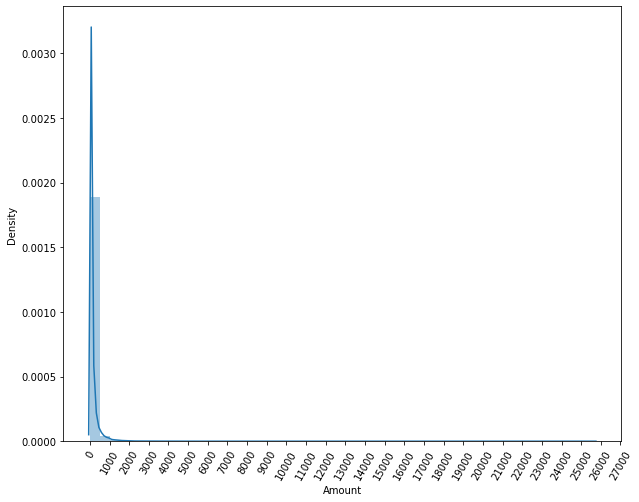

In [19]:
import seaborn as sns
plt.figure(figsize = (10,8))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_df['Amount'])

# 결과
# 대부분의 금액이 500유로 미만
# 나머지 작은 값들이 존재 (약 25600까지)
# 불균형함
# 작은 값들이 길게 long-tail을 가지고 있는 구조 

In [1]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처 값 변환하는 로직으로 수정
def get_preprocessed_df (df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy

In [3]:
x_train,x_test,y_train,y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=x_train,ftr_test=x_test,tgt_train=y_train,tgt_test=y_test)


NameError: name 'get_train_test_dataset' is not defined

# 정리
* 앙상블 기법
    * 결정 트리 기반의 다수의 약한 학습기를 결합해 변동성을 줄여 예측 오류를 줄이고 성능을 개선
    * 결정 트리 알고리즘은 정보의 균일도에 기반한 규칙 트리를 만들어서 예측을 수행
    * 결정트리는 다른 알고리즘에 비해 직관적 과정 보기 쉬움
    * 단점은 균일한 최종 예측 결과를 도출하기 위해 결정 트리가 깊어지고 복잡해지면 **과적합** 쉽게 발생
1. 배깅
    * 학습 데이터를 **중복을 허용**
    * 다수의 세트로 샘플링
    * 다수의 약한 학습기가 학습한 뒤 최종 결과를 결합해 예측
    * 대표적 방법 : **랜덤포레스트**
2. 부스팅
    * 부스팅이 대세
    * 학습기들이 순차적으로 학습을 진행하면서 예측이 틀린 데이터에 대해서는 가중치를 부여해 다음번 학습기가 학습할 때보다 높은 정확도로 예츠할 수 있도록
    * **GBM (Gradient Boosting Machine)**은 뛰어난 예측 성능, 그러나 수행시간 오래걸림
    * 대표적 : **XGBoost**와 **LightGBM**

* 스태킹 기법
    * 여러 개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트를 재 생성하는 기법